In [1]:
!pip install biokit

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from biokit.viz import corrplot
import matplotlib.pyplot as plt

uri = 'https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv'
df = pd.read_csv(uri)

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
print(f'O dado possui {df.shape[0]} amostras e {df.shape[1]} atributos')

O dado possui 178 amostras e 14 atributos


In [4]:
df = df.rename(columns = {'Alcohol' : 'Alcool', 'Ash' : 'Po', 'Ash_Alcalinity': 'Alcalinidade_po',
                          'Magnesium' : 'Magnesio','Total_Phenols' : 'Total_Fenois',
                          'Nonflavanoid_Phenols':'Fenois_nao_flavalonoides','Color_Intensity':'Intensidade_de_cor'})

In [5]:
df.head()

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
df.describe()

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [7]:
matriz_corr = df.corr()

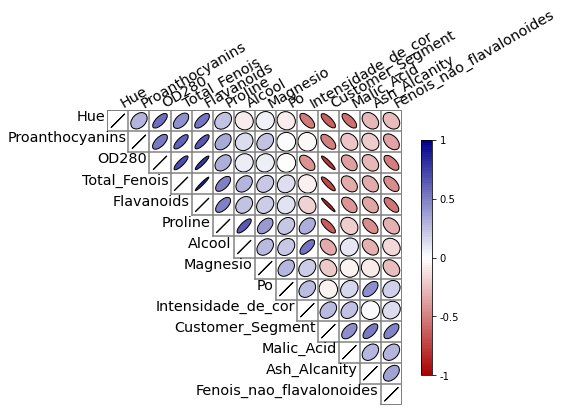

In [8]:
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(13,8)
fig.show()

In [9]:
colunas = df.columns
atributos = colunas

In [10]:
from sklearn import preprocessing

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)

df = pd.DataFrame(np_df, columns = atributos)

In [12]:
df.describe()

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
np_df = min_max_scaler.inverse_transform(df)
df = pd.DataFrame(np_df, columns = atributos)
df.describe()

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)

df = pd.DataFrame(np_df, columns = atributos)
#normalizados

In [15]:
from sklearn.cluster import KMeans

In [16]:
agrupador = KMeans(n_clusters=4)
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 1 3 1 1 1 3 1 3 1 3 1
 1 3 1 3 1 1 1 1 3 3 1 1 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 3 1 3 1 3 3 3 1 1 1
 1 3 3 3 3 1 1 3 1 1 1 1 1 1 1 1 3 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Intensidade_de_cor'], y = df['Alcool'],
                                                        mode = 'markers',                      
                                                        marker = dict(color = agrupador.labels_.astype(np.float)),
                                                        text = labels))
fig.show()

In [18]:
agrupador = KMeans(n_clusters=3)
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Intensidade_de_cor'],
                         y = df['Alcool'], mode = 'markers',                      
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                        text = labels))

fig.show()

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
                         y = df['Alcool'], z = df['Proline'],
                         mode = 'markers',                      
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                        text = [0, 1, 2]))
fig.show()

In [21]:
fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))
fig.show()

In [22]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = colunas
centros.head()

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796
1,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333
2,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000


In [23]:
fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'],
                         y = centros['Alcool'], z=centros['Proline'],
                         mode = 'markers',                  
                          marker = dict(color = 'red'),
                        text = [0, 1, 2]))

fig.show()

In [24]:
from sklearn.cluster import DBSCAN
agrupador = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')
agrupador.fit(df)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [25]:
agrupador.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

In [26]:
np.unique(agrupador.labels_)

array([-1,  0,  1,  2])

In [27]:
agrupador = DBSCAN(eps = 0.10, min_samples = 15, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [28]:
agrupador = DBSCAN(eps = 10, min_samples = 15, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [29]:
agrupador = DBSCAN(eps = 1.5, min_samples = 30, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [30]:
agrupador = DBSCAN(eps = 1.5, min_samples = 80, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [31]:
agrupador = DBSCAN(eps = 0.7, min_samples = 15, metric = 'euclidean')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [32]:
from sklearn.cluster import MeanShift

In [33]:
agrupador = MeanShift()
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [34]:
from sklearn.cluster import estimate_bandwidth

In [39]:
BW = estimate_bandwidth(df, quantile = 0.8)
print(BW)

1.4612284092106416


In [46]:
BW = estimate_bandwidth(df, quantile = 0.1)
agrupador = MeanShift(bandwidth = BW)
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  8,  1,  1,  1,  5,  1,  1,  1,  1,
        1,  3,  1,  5,  1,  7,  1,  1,  1,  1,  3,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3, 10,  1,  1, 13,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, 12,  1,  1,  1,  1, 13,  1,  1,  1,
        1,  1, 11,  6,  6,  9,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  4,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2])

In [58]:
gig =go.Figure()
fig.add_trace(go.Scatter3d(x = df['Intensidade_de_cor'],
                     y = df['Alcool'],
                     z = df['Proline'],
                     mode = 'markers',
                     marker = dict(color = labels.astype(np.float)),
                     text = labels))

fig.show()

In [59]:
from sklearn.metrics import silhouette_samples, silhouette_score

faixa_n_clusters = [i for i in range(2,10)]
print(faixa_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


In [60]:
from sklearn.cluster import KMeans
valores_silhueta = []
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters=k)
    labels = agrupador.fit_predict(df)
    media_silhueta = silhouette_score(df, labels)
    valores_silhueta.append(media_silhueta)

In [62]:
fig =go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title = "Valores de Silhueta Médios",
    xaxis_title = "Número de Clústeres",
    yaxis_title = "Valor médio de silhueta",
    )

In [63]:
faixa_quantil = np.linspace(0.02, 0.5, 15)
faixa_quantil

array([0.02      , 0.05428571, 0.08857143, 0.12285714, 0.15714286,
       0.19142857, 0.22571429, 0.26      , 0.29428571, 0.32857143,
       0.36285714, 0.39714286, 0.43142857, 0.46571429, 0.5       ])

In [65]:
valores_silhueta = []
quantil_plot = []

for quantil in faixa_quantil:
    bandwidth = estimate_bandwidth(df, quantile = quantil)
    agrupador = MeanShift(bandwidth = bandwidth) 
    labels = agrupador.fit_predict(df)

if (len(np.unique(labels)) < len(df) and len(np.unique(labels)) > 1):
        media_silhueta = silhouette_score(df, labels)
        valores_silhueta.append(media_silhueta)
        quantil_plot.append(quantil)

In [66]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot,
                         y = valores_silhueta))
fig.update_layout(dict(xaxis_title = 'Quantil',
                       yaxis_title='Média Silhueta')),
fig.show()

In [67]:
faixa_quantil = np.linspace(0.02, 0.5, 30)
faixa_quantil

array([0.02      , 0.03655172, 0.05310345, 0.06965517, 0.0862069 ,
       0.10275862, 0.11931034, 0.13586207, 0.15241379, 0.16896552,
       0.18551724, 0.20206897, 0.21862069, 0.23517241, 0.25172414,
       0.26827586, 0.28482759, 0.30137931, 0.31793103, 0.33448276,
       0.35103448, 0.36758621, 0.38413793, 0.40068966, 0.41724138,
       0.4337931 , 0.45034483, 0.46689655, 0.48344828, 0.5       ])

In [68]:
valores_silhueta = []
quantil_plot = []

for quantil in faixa_quantil:
    bandwidth = estimate_bandwidth(df, quantile = quantil)
    agrupador = MeanShift(bandwidth = bandwidth) 
    labels = agrupador.fit_predict(df)

if (len(np.unique(labels)) < len(df) and len(np.unique(labels)) > 1):
        media_silhueta = silhouette_score(df, labels)
        valores_silhueta.append(media_silhueta)
        quantil_plot.append(quantil)

In [69]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot,
                         y = valores_silhueta))
fig.update_layout(dict(xaxis_title = 'Quantil',
                       yaxis_title='Média Silhueta')),
fig.show()

In [70]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [73]:
agrupador_kmeans = KMeans(n_clusters = 3)
agrupador_dbscan = DBSCAN(eps = 2.1, min_samples = 56, metric = 'manhattan')

BW = estimate_bandwidth(df, quantile = 0.28)
agrupador_meanshift = MeanShift(bandwidth = BW)

labels_kmeans = agrupador_kmeans.fit_predict(df)
labels_dbscan = agrupador_dbscan.fit_predict(df)
labels_meanshift = agrupador_meanshift.fit_predict(df)

print("Labels K-means: ", labels_kmeans)
print("Labels DBSCAN: ", labels_dbscan)
print("Labels MeanShift: ", labels_meanshift)

Labels K-means:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Labels DBSCAN:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0 -1  0  0  0 -1 -1 -1  0
  0 -1  0  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1  0 -1  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Labels MeanShift:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [75]:
print("O coeficiente de silhueta do K-means é:", silhouette_score(df, labels_kmeans))
print("O coeficiente de silhueta do DBSCAN é: ", silhouette_score(df,labels_dbscan))
print("O coeficiente de silhueta do MeanShift é: ", silhouette_score(df,labels_meanshift))

O coeficiente de silhueta do K-means é: 0.3695061849273629
O coeficiente de silhueta do DBSCAN é:  0.3016232115094375
O coeficiente de silhueta do MeanShift é:  0.3059152866115628
